
# 🧪 K-means Clustering on Wholesale Customers Dataset

This notebook demonstrates how to apply **K-means clustering** to the **UCI Wholesale Customers** dataset.

## 📋 Steps:
- Load and preprocess the data
- Apply K-means clustering with different k values
- Evaluate using **Silhouette Score** and **Davies-Bouldin Index**
- Visualize clusters using **PCA**


In [30]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load dataset từ file CSV trong cùng thư mục
df = pd.read_csv("Wholesale customers data.csv")
#df.head
# Drop cột Region và Channel vì chúng là categorical (ordinal) không cần thiết
X = df.drop(['Region', 'Channel'], axis=1)
X.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [14]:
# Normalize dữ liệu về khoảng [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:

# Tính silhouette scores cho k = 2 đến 10
silhouette_scores = []
print("Silhouette Scores for each k:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k}: Silhouette Score = {score:.4f}")



Silhouette Scores for each k:
k = 2: Silhouette Score = 0.2871
k = 3: Silhouette Score = 0.4182
k = 4: Silhouette Score = 0.4093
k = 5: Silhouette Score = 0.3595
k = 6: Silhouette Score = 0.3573
k = 7: Silhouette Score = 0.3185
k = 8: Silhouette Score = 0.2826
k = 9: Silhouette Score = 0.2622
k = 10: Silhouette Score = 0.2422


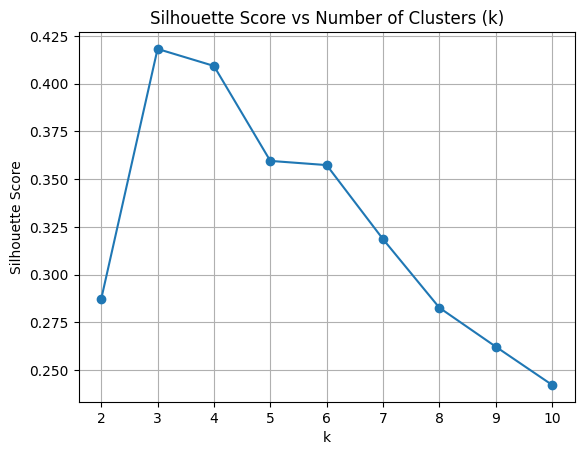

In [19]:
# Vẽ biểu đồ silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Based on the Silhouette Score curve, the optimal number of clusters is k = 3, as it gives the highest score (~0.42). This indicates that the data is best separated into three well-defined clusters. Increasing the number of clusters beyond 3 leads to lower silhouette scores, suggesting that the clustering quality declines due to overlapping or unnecessarily fragmented clusters.

Best k based on silhouette score: 3


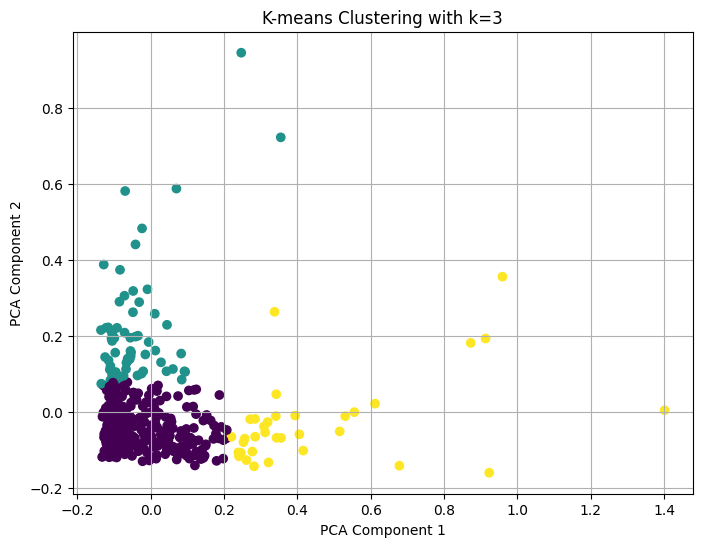

In [16]:

# Chọn k tốt nhất
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Best k based on silhouette score: {best_k}")

# Fit lại với best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

# PCA để giảm xuống 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Vẽ scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_final, cmap='viridis')
plt.title(f"K-means Clustering with k={best_k}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [17]:

# Tính Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, labels_final)
print(f"Davies-Bouldin Index: {db_score:.2f}")


Davies-Bouldin Index: 1.10


In [24]:
# K-means++ initialization (default)
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_pp = kmeans_pp.fit_predict(X_scaled)
score_pp = silhouette_score(X_scaled, labels_pp)

# Random initialization
kmeans_random = KMeans(n_clusters=3, init='random', random_state=42)
labels_random = kmeans_random.fit_predict(X_scaled)
score_random = silhouette_score(X_scaled, labels_random)

print(f"K-means++ Silhouette Score: {score_pp:.4f}")
print(f"Random init Silhouette Score: {score_random:.4f}")


K-means++ Silhouette Score: 0.4182
Random init Silhouette Score: 0.4398


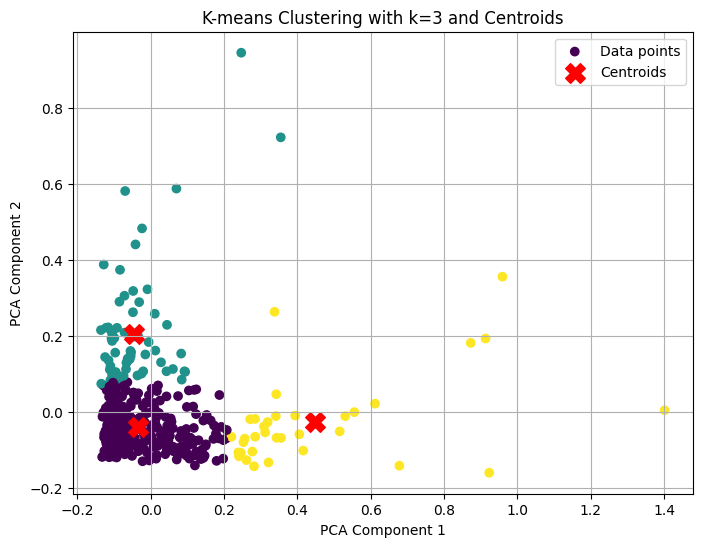

In [21]:
# Gán lại mô hình với k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Nếu đã có X_pca thì không cần PCA lại, chỉ transform centroids:
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Vẽ scatter với centroid
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', label='Data points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f"K-means Clustering with k={k} and Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


## 1.3 Analyze and Compare the Results with Different Values of k

To analyze the clustering results, we applied K-means with different values of k (number of clusters) and visualized the results using PCA 2D scatter plots.

We selected representative values of k:
- **k = 3**: The best value based on silhouette score.
- **k = 5**: Medium value to observe how the data splits further.
- **k = 9**: Large k to see the effect of overfitting.

This helps us understand how increasing the number of clusters affects the structure and clarity of the grouping.


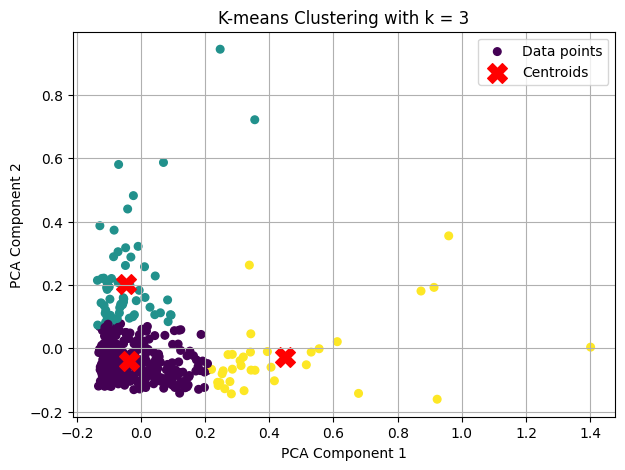

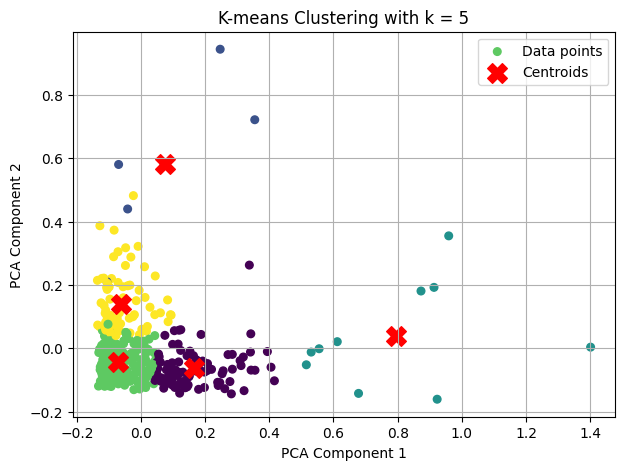

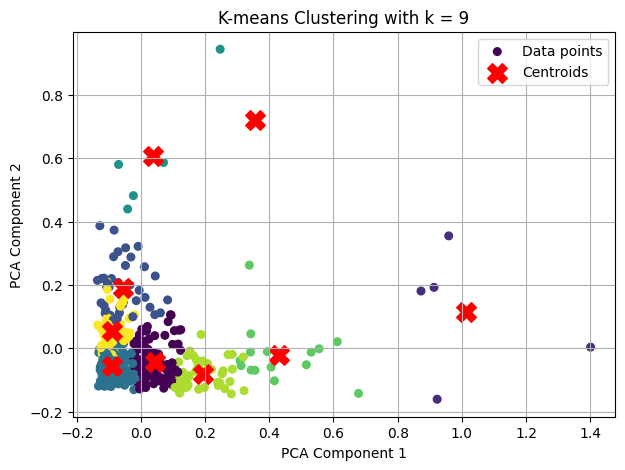

In [25]:
k_list = [3, 5, 9]

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids_pca = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(7, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30, label='Data points')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title(f"K-means Clustering with k = {k}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()


### Observations:

- **k = 3**: The clusters are relatively well separated, consistent with the highest silhouette score.
- **k = 5**: Some large clusters are split into smaller subgroups, leading to minor overlaps between clusters.
- **k = 9**: The dataset is divided into many small clusters. Some clusters are visually indistinguishable and overlapping, indicating overfitting.

As k increases, the clustering becomes more granular but potentially less meaningful and less generalizable.


## 1.4 Calculate the Clustering Quality

To evaluate the clustering quality, we used the **Davies-Bouldin Index (DBI)**.

### 🔹 What is DBI?
- It measures the average "similarity" between clusters.
- Lower values of DBI indicate **better** clustering: clusters are compact and well-separated.

### 🔹 Formula (simplified):
\[
DB = \frac{1}{K} \sum_{i=1}^{K} \max_{j \ne i} \frac{S_i + S_j}{d(C_i, C_j)}
\]
Where:
- \( S_i \): Average distance of all points in cluster i to its centroid
- \( d(C_i, C_j) \): Distance between centroids of clusters i and j

We computed DBI for different values of k to find the configuration with the lowest index.


In [26]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

print("Davies-Bouldin Index for each k:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    db_index = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db_index)
    print(f"k = {k}: DBI = {db_index:.4f}")


Davies-Bouldin Index for each k:
k = 2: DBI = 1.4930
k = 3: DBI = 1.1036
k = 4: DBI = 0.9710
k = 5: DBI = 1.0851
k = 6: DBI = 0.9887
k = 7: DBI = 0.8557
k = 8: DBI = 1.0150
k = 9: DBI = 1.0733
k = 10: DBI = 1.0153


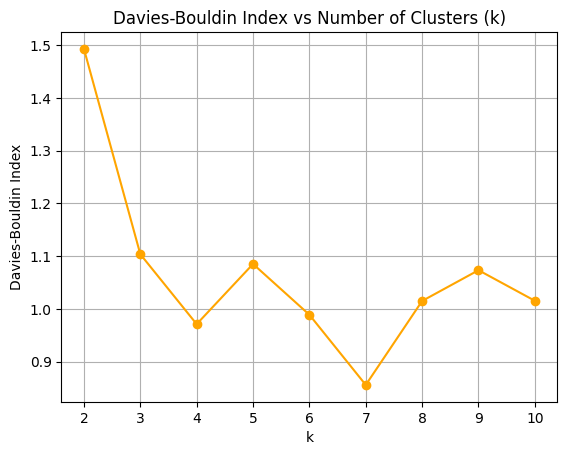

In [27]:
plt.plot(range(2, 11), db_scores, marker='o', color='orange')
plt.title("Davies-Bouldin Index vs Number of Clusters (k)")
plt.xlabel("k")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)
plt.show()


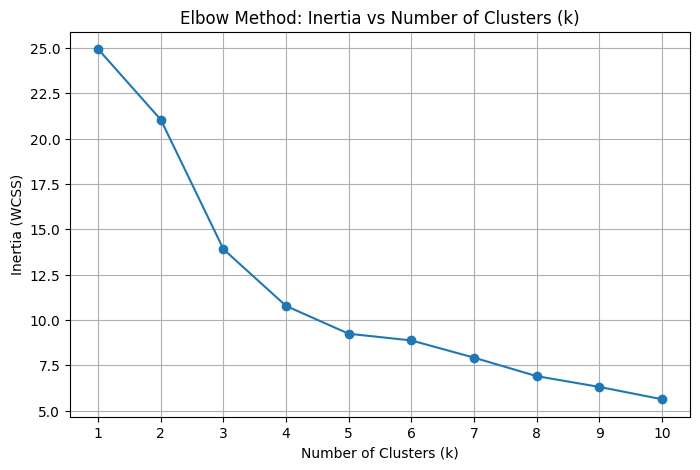

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tính Inertia cho k từ 1 đến 10
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.title("Elbow Method: Inertia vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(k_values)
plt.grid(True)
plt.show()
